# Градиентный бустинг и деревья решений
### Автор: Ракитин Виталий, BD-31

###### Вариант 3. Реализация алгоритма градиентного бустинга с квадратичной функцией потерь. В качестве базового алгоритма использоватьалгоритм CART (с линейными признаками) (задача регрессии)


In [2]:
import numpy as np
import pylab as pl

from Boost import LinearTree, GradientBoosting, Tree
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import GradientBoostingRegressor

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# IRIS
from sklearn import datasets

iris = datasets.load_iris()
data = iris['data']
target = iris['target']

In [4]:
# Спам
train_data = np.loadtxt("spam.train.txt")
X_train = train_data[:, 1:]
Y_train = train_data[:, 0]

test_data = np.loadtxt("spam.test.txt")
X_test = test_data[:, 1:]
Y_test = test_data[:, 0]

In [5]:
def MSE(target, prediction):
    return ((target - prediction)**2).sum() / len(target)


def Error(my_predict, sklearn_predict):
    ''' relative error '''
    
    if sklearn_predict == 0:
        return my_predict
    
    else:
        return (my_predict - sklearn_predict)/sklearn_predict
        
        
def Test(name, 
         data,
         target, 
         max_depth, 
         model, 
         sklearn_model, 
         is_test = False, 
         test_data = None, 
         test_target = None):
    
    print ("TEST: {0}".format(name))
    
    for md in range(1, max_depth + 1):
        print()
        print ("Depth: {0}".format(md))
        
        tr = model(max_depth=md).fit(data=data, target=target)
        pr = MSE(target, tr.predict(data))
        print ("Prediction of the Tree: {0}".format(pr))
        
        sk_tr = sklearn_model(max_depth=md).fit(data, target)
        sk_pr = MSE(target, sk_tr.predict(data))
        print ("Prediction of Sklearn Tree: {0}".format(sk_pr))
        print ("Error: {0}".format(Error(pr, sk_pr)))
        
        if is_test:
            pr = MSE(test_target, tr.predict(test_data))
            sk_pr = MSE(test_target, sk_tr.predict(test_data))
            print ("Test Prediction of the Tree: {0}".format(pr))
            print ("Test Prediction of Sklearn Tree: {0}".format(sk_pr))
            print ("Test Error: {0}".format(Error(pr, sk_pr)))


## 1. Деревья

### 1.1 Деревья решений

#### Протестируем на IRIS

In [115]:
Test(name = "Iris", 
     data=data,
     target = target,
     max_depth=6, 
     model=Tree, 
     sklearn_model=DecisionTreeRegressor)

TEST: Iris

Depth: 1
Prediction of the Tree: 0.16666666666666666
Prediction of Sklearn Tree: 0.16666666666666666
Error: 0.0

Depth: 2
Prediction of the Tree: 0.0367686527106817
Prediction of Sklearn Tree: 0.0367686527106817
Error: 0.0

Depth: 3
Prediction of the Tree: 0.019861111111111114
Prediction of Sklearn Tree: 0.019861111111111114
Error: 0.0

Depth: 4
Prediction of the Tree: 0.0044444444444444444
Prediction of Sklearn Tree: 0.0044444444444444444
Error: 0.0

Depth: 5
Prediction of the Tree: 0.0
Prediction of Sklearn Tree: 0.0
Error: 0.0

Depth: 6
Prediction of the Tree: 0.0
Prediction of Sklearn Tree: 0.0
Error: 0.0


#### Протестируем на спаме

In [71]:
Test(name = "Spam", 
     data=X_train,
     target = Y_train,
     max_depth=5, 
     model=Tree, 
     sklearn_model=DecisionTreeRegressor,
     is_test = True,
     test_data = X_test,
     test_target = Y_test
    )

TEST: Spam

Depth: 1
Prediction of the Tree: 0.15656147711855795
Prediction of Sklearn Tree: 0.15656147711855795
Error: 0.0
Test Prediction of the Tree: 0.12446198984602179
Test Prediction of Sklearn Tree: 0.12446198984602179
Test Error: 0.0

Depth: 2
Prediction of the Tree: 0.11930271803650848
Prediction of Sklearn Tree: 0.11930271803650848
Error: 0.0
Test Prediction of the Tree: 0.12013308073036076
Test Prediction of Sklearn Tree: 0.12013308073036076
Test Error: 0.0

Depth: 3
Prediction of the Tree: 0.09417726399296775
Prediction of Sklearn Tree: 0.09417726399296775
Error: 0.0
Test Prediction of the Tree: 0.1582768611608585
Test Prediction of Sklearn Tree: 0.15861836385572825
Test Error: -0.0021529833404431865

Depth: 4
Prediction of the Tree: 0.07357464786081899
Prediction of Sklearn Tree: 0.07357464786081899
Error: 0.0
Test Prediction of the Tree: 0.1395241521870245
Test Prediction of Sklearn Tree: 0.1375236962723577
Test Error: 0.014546263435975515

Depth: 5
Prediction of the Tree

##### Вывод: данное дерево абсолютно соответствует реализации  в sklearn. Относительная ошибка на тестовой выборке не превышает 3%.

### 1.2 Дерево с линейными признаками

#### Протестируем на IRIS

In [10]:
Test(name = "Iris", 
     data=data,
     target = target,
     max_depth=10, 
     model=LinearTree, 
     sklearn_model=DecisionTreeRegressor
    )

TEST: Iris

Depth: 1
Prediction of the Tree: 0.1917426545086119
Prediction of Sklearn Tree: 0.16666666666666666
Error: 0.15045592705167138

Depth: 2
Prediction of the Tree: 0.013048484848484842
Prediction of Sklearn Tree: 0.0367686527106817
Error: -0.6451193098871932

Depth: 3
Prediction of the Tree: 0.005
Prediction of Sklearn Tree: 0.019861111111111114
Error: -0.7482517482517482

Depth: 4
Prediction of the Tree: 0.0
Prediction of Sklearn Tree: 0.0044444444444444444
Error: -1.0

Depth: 5
Prediction of the Tree: 0.0
Prediction of Sklearn Tree: 0.0
Error: 0.0

Depth: 6
Prediction of the Tree: 0.0
Prediction of Sklearn Tree: 0.0
Error: 0.0

Depth: 7
Prediction of the Tree: 0.0
Prediction of Sklearn Tree: 0.0
Error: 0.0

Depth: 8
Prediction of the Tree: 0.0
Prediction of Sklearn Tree: 0.0
Error: 0.0

Depth: 9
Prediction of the Tree: 0.0
Prediction of Sklearn Tree: 0.0
Error: 0.0

Depth: 10
Prediction of the Tree: 0.0
Prediction of Sklearn Tree: 0.0
Error: 0.0


#### Протестируем на спаме

In [6]:
Test(name = "Spam", 
     data=X_train,
     target = Y_train,
     max_depth=7, 
     model=LinearTree, 
     sklearn_model=DecisionTreeRegressor,
     is_test = True,
     test_data = X_test,
     test_target = Y_test
    )

TEST: Spam

Depth: 1
Prediction of the Tree: 0.041819309673603276
Prediction of Sklearn Tree: 0.15656147711855795
Error: -0.7328888916784099
Test Prediction of the Tree: 0.12154662616265235
Test Prediction of Sklearn Tree: 0.12446198984602179
Test Error: -0.02342372709110772

Depth: 2
Prediction of the Tree: 0.03623441520265188
Prediction of Sklearn Tree: 0.11930271803650848
Error: -0.6962817293771666
Test Prediction of the Tree: 0.13587273155023663
Test Prediction of Sklearn Tree: 0.12013308073036076
Test Error: 0.1310184565665438

Depth: 3
Prediction of the Tree: 0.027326175344080668
Prediction of Sklearn Tree: 0.09417726399296775
Error: -0.7098431809813341
Test Prediction of the Tree: 0.2765670644780914
Test Prediction of Sklearn Tree: 0.15861836385572825
Test Error: 0.7436005375118083

Depth: 4
Prediction of the Tree: 0.014392586155722982
Prediction of Sklearn Tree: 0.07357464786081899
Error: -0.8043811751168771
Test Prediction of the Tree: 0.14484922594756944
Test Prediction of Sk

##### Вывод: добавление линейной регрессии в листья значительно увеличело скорость обучения. Качество на неглубоких деревьях получается лучше, чем  в sklearn. Однако оно быстро перееобучается.

## 2. Градиентный Бустинг

In [10]:
boost = GradientBoosting(max_depth=1, n_estimators=50)

In [11]:
boost.fit(X_train, Y_train, X_test, Y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [00:42<00:00,  1.17s/it]


In [13]:
# Градиентный бустинг из sklearn
from tqdm import tqdm
losses = []
test_losses = []
for i in tqdm(range(1, 50)):
    b = GradientBoostingRegressor(n_estimators = i, max_depth=1, criterion = 'mse')
    b.fit(X_train, Y_train)
    losses.append(MSE(b.predict(X_train), Y_train))
    test_losses.append(MSE(b.predict(X_test), Y_test))

100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [00:12<00:00,  2.26it/s]


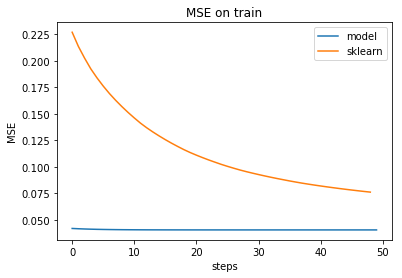

In [14]:
pl.plot(boost.loss, label = 'model')
pl.plot(losses, label = 'sklearn')

plt.ylabel('MSE')
plt.xlabel('steps')
plt.title('MSE on train')
pl.legend()

plt.show()

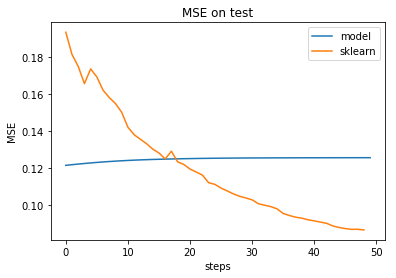

In [15]:
pl.plot(boost.test_loss, label = 'model')
pl.plot(test_losses, label = 'sklearn')

plt.ylabel('MSE')
plt.xlabel('steps')
plt.title('MSE on test')
pl.legend()

plt.show()

#### Заметно, что модель быстрее даёт качество лучше, чем sklearn, но очень сильно переобучается

### Попробуем обычное дерево

In [6]:
boost = GradientBoosting(max_depth=2, n_estimators=200, model = Tree)

In [8]:
boost.fit(X_train, Y_train, X_test, Y_test)

In [9]:
# Градиентный бустинг из sklearn
losses = []
test_losses = []
for i in range(1, 200):
    b = GradientBoostingRegressor(n_estimators = i, max_depth=2, criterion = 'mse')
    b.fit(X_train, Y_train)
    losses.append(MSE(b.predict(X_train), Y_train))
    test_losses.append(MSE(b.predict(X_test), Y_test))

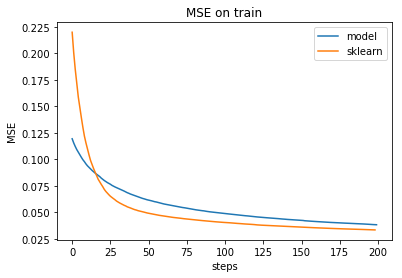

In [65]:
pl.plot(boost.loss, label = 'model')
pl.plot(losses, label = 'sklearn')

plt.ylabel('MSE')
plt.xlabel('steps')
plt.title('MSE on train')
pl.legend()

plt.show()

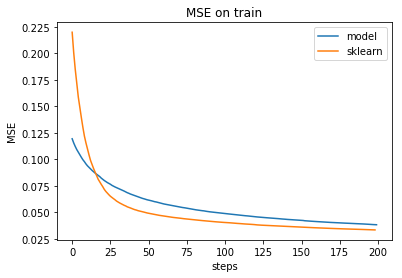

In [64]:
pl.plot(boost.loss, label = 'model')
pl.plot(losses, label = 'sklearn')

plt.ylabel('MSE')
plt.xlabel('steps')
plt.title('MSE on train')
pl.legend()

plt.show()

### Попробуем бустинг на sklearn-дереве

In [5]:
boost = GradientBoosting(max_depth=2, n_estimators=200, model = DecisionTreeRegressor)
boost.fit(X_train, Y_train)

100%|████████████████████████████████████████████████████████████████████████████████| 199/199 [00:13<00:00, 14.39it/s]


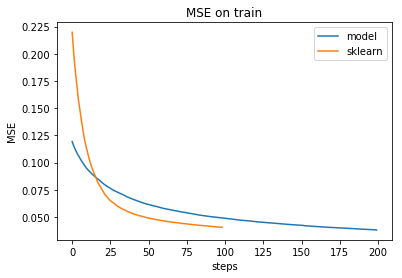

In [8]:
pl.plot(boost.loss, label = 'model')
pl.plot(losses, label = 'sklearn')

plt.ylabel('MSE')
plt.xlabel('steps')
plt.title('MSE on train')
pl.legend()

plt.show()

In [9]:
boost.loss[-1]

0.038094595113448766